# Test Palma data

In [1]:
import tasks as tsk
import numpy as np
import pandas as pd
from tourist import Tourist
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt

In [2]:
tasks = pd.read_csv(
            "palmadata/palmapointsofinterest_cleaned.csv", 
            header = 0,
            dtype = {
                "place": 'str',
                "description": 'str',
                "latitude": 'float',
                "longitude": 'float',
                "stars": 'float',
                "reviews": 'float'
            }
        )

In [3]:
tasks["update_utility"] = tsk.standard_penalty

In [4]:
low   = [
         "Plaça de Cort",
         "Plaça de toros de Palma",
         "Plaza Del Mercat",
         "Plaça del Rei Joan Carles I"
        ]
high = [
         "Catedral-Basílica de Santa María de Mallorca",
         "Castell de Bellver",
         "Royal Palace of La Almudaina",
         "Museu Fundación Juan March, Palma",
         "Museo de Mallorca",
         "Museu Diocesà de Mallorca"
        ]

In [5]:
def set_penalty(row, lows, highs):
    if row.place == "cruise ship":
        return tsk.cruise_utility
    elif row.place in lows:
        return tsk.low_penalty
    elif row.place in highs:
        return tsk.high_penalty
    else:
        return row.update_utility


tasks["update_utility"] = tasks.apply(lambda row: set_penalty(row, low, high), axis=1)

In [6]:
tasks

,place,description,latitude,longitude,stars,reviews,utility,update_utility
0,cruise ship,tourist cruise ship,39.568276,2.637640,0.000000,0.0,0.000000,<function cruise_utility at 0x7f8bb37e4430>
1,Catedral-Basílica de Santa María de Mallorca,Gothic place of worship on the seafront,39.567425,2.648299,4.674750,31176.0,0.951213,<function high_penalty at 0x7f8bb37e43a0>
2,Castell de Bellver,Hilltop 1300s castle for panoramic views,39.563814,2.619354,4.436243,10446.0,0.749203,<function high_penalty at 0x7f8bb37e43a0>
3,Royal Palace of La Almudaina,Historic palace of the Royal Family,39.567886,2.647022,4.420346,2310.0,0.681576,<function high_penalty at 0x7f8bb37e43a0>
4,Tren Soller,Scenic electric railway dating to 1912,39.576665,2.653782,4.396561,5757.0,0.705649,<function standard_penalty at 0x7f8bf89da550>
5,Es Baluard Museu d'Art Contemporani de Palma,Modern & contemporary art collection,39.570139,2.641112,4.257859,2513.0,0.658831,<function standard_penalty at 0x7f8bf89da550>
6,Plaza Mayor,Historic public square with craft market,39.571371,2.651813,4.244744,21071.0,0.805680,<function standard_penalty at 0x7f8bf89da550>
7,Poble Espanyol de Palma,Venue with recreated Spanish landmarks,39.572720,2.627968,4.057202,2430.0,0.628066,<function standard_penalty at 0x7f8bf89da550>
8,Lonja de Mallorca,Historic building with Gothic design,39.568358,2.644337,4.441206,1956.0,0.681866,<function standard_penalty at 0x7f8bf89da550>
9,Born de Palma,Historic street with high-end shopping,39.570953,2.647002,NaN,NaN,0.110000,<function standard_penalty at 0x7f8bf89da550>


In [7]:
touristt = Tourist(tasks, 20)

In [8]:
touristt.tourist_route()

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

In [9]:
touristt.task_route

[0, 6, 3, 12, 35, 43, 11, 33, 8, 47, 9, 19, 0, 14, 0, 32, 7, 31, 26, 17, 38]

In [10]:
sites = tasks.place[touristt.task_route]
visit_order = [str(i) for i in range(0, len(touristt.task_route))]

In [11]:
list(zip(visit_order, sites))

[('0', 'cruise ship'),
 ('1', 'Plaza Mayor'),
 ('2', 'Royal Palace of La Almudaina'),
 ('3', 'Mercat de l’Olivar'),
 ('4', 'Can Forteza Rey'),
 ('5', 'Mission: Escape. Escape Room Mallorca'),
 ('6', 'Arab Baths of Palma de Mallorca'),
 ('7', 'Avenida Jaime III'),
 ('8', 'Lonja de Mallorca'),
 ('9', 'Roman Catholic Diocese of Majorca'),
 ('10', 'Born de Palma'),
 ('11', 'Església de Santa Eulàlia'),
 ('12', 'cruise ship'),
 ('13', 'Museu Fundación Juan March, Palma'),
 ('14', 'cruise ship'),
 ('15', 'Fundación Bartolomé March'),
 ('16', 'Poble Espanyol de Palma'),
 ('17', 'Sa Feixina Park'),
 ('18', 'Convent de Santa Clara'),
 ('19', 'Mercado Gastronómico San Juan'),
 ('20', 'Consolat de Mar de Palma')]

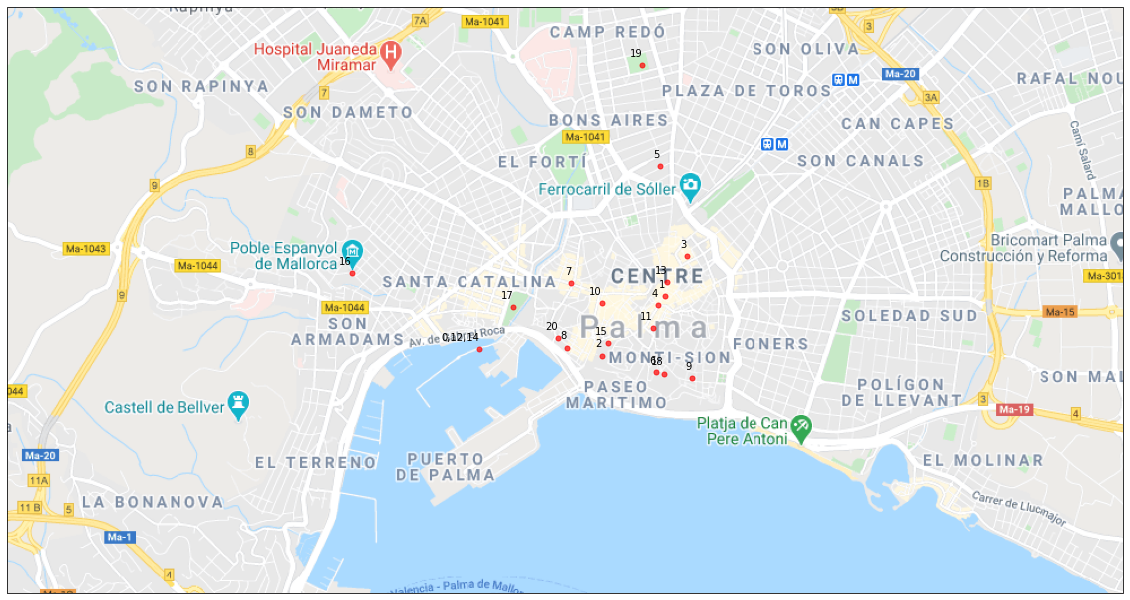

In [12]:
# values
latitude = tasks['latitude'].values[touristt.task_route]
longitude = tasks['longitude'].values[touristt.task_route]
sites = tasks.place[touristt.task_route]
visit_order = [str(i) for i in range(0, len(touristt.task_route))]

if len(set(sites)) != len(sites):
    dupl_route_df = pd.DataFrame(list(zip(visit_order, sites, latitude, longitude)), 
                                 columns=['visit_order','sites', 'latitude', 'longitude'])\
                       .groupby(['sites', 'latitude', 'longitude']).apply(lambda x: ','.join(x.visit_order))
    sites = [ name  for (name,_,_) in dupl_route_df.index.values]
    latitude = [ lat  for (_,lat,_) in dupl_route_df.index.values]
    longitude = [ lon  for (_,_,lon) in dupl_route_df.index.values]
    visit_order = dupl_route_df.values

# Map background
ffig = plt.figure(figsize=(20,25))

tiler = cimgt.GoogleTiles()
mercator = tiler.crs
ax = plt.axes(projection=mercator)

llcrnrlat=39.553956  # The lower left corner geographical latitude
llcrnrlon=2.601714   # The lower left corner geographical longitude
urcrnrlat=39.588358  # The upper right corner geographical latitude
urcrnrlon=2.686728 

ax.set_extent([llcrnrlon,urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())

zoom = 14
ax.add_image(tiler, zoom )

plt.plot(longitude, latitude, marker='o', color='red', markersize=5, lw=0,
         alpha=0.7, transform=ccrs.Geodetic())

for visit_order_, xpt, ypt in zip(visit_order, longitude, latitude):
     plt.text(xpt, ypt+0.0005, visit_order_, horizontalalignment='right', transform=ccrs.Geodetic())

plt.show()

## Multiple tourist simulation

In [56]:
ntourists = 100
time = 20
summary_df = pd.DataFrame(np.zeros(shape=(time,tasks.shape[0])),
                                 columns=tasks['place'].values)

for tourist in range(0, ntourists):
    get_tourist = Tourist(tasks, time)
    get_tourist.tourist_route()
    for t in range(0, time):
        summary_df.iloc[t,get_tourist.task_route[t]] += 1
    print("\n")

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20

In [61]:
summary_df

,cruise ship,Catedral-Basílica de Santa María de Mallorca,Castell de Bellver,Royal Palace of La Almudaina,Tren Soller,Es Baluard Museu d'Art Contemporani de Palma,Plaza Mayor,Poble Espanyol de Palma,Lonja de Mallorca,Born de Palma,...,Device to Root out Evil,Roman Catholic Diocese of Majorca,"Estàtua ""Es Foner""",Can Vivot,Plaça del Rei Joan Carles I,tapas-tour,GOB - Grup Balear d'Ornitologia I Defensa de la Naturalesa,Ca'n Oms,La Misericòrdia,ABA ART LAB
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,4.0,0.0,6.0,0.0,0.0,2.0,0.0,4.0,0.0,...,4.0,2.0,2.0,1.0,0.0,1.0,0.0,2.0,5.0,0.0
2,0.0,5.0,2.0,2.0,4.0,4.0,2.0,5.0,1.0,0.0,...,4.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,2.0,1.0
3,0.0,8.0,0.0,0.0,3.0,2.0,3.0,2.0,2.0,0.0,...,0.0,3.0,6.0,1.0,0.0,0.0,0.0,1.0,3.0,2.0
4,0.0,3.0,1.0,5.0,3.0,1.0,2.0,2.0,5.0,0.0,...,2.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0
5,0.0,2.0,0.0,2.0,2.0,3.0,9.0,4.0,0.0,0.0,...,2.0,1.0,3.0,1.0,0.0,0.0,2.0,1.0,2.0,3.0
6,0.0,3.0,0.0,0.0,2.0,0.0,4.0,0.0,5.0,0.0,...,2.0,2.0,0.0,3.0,2.0,0.0,1.0,3.0,3.0,1.0
7,0.0,4.0,2.0,5.0,0.0,3.0,2.0,0.0,0.0,0.0,...,1.0,1.0,4.0,3.0,0.0,0.0,1.0,2.0,1.0,3.0
8,0.0,3.0,0.0,5.0,1.0,3.0,3.0,2.0,2.0,0.0,...,0.0,1.0,0.0,3.0,0.0,1.0,2.0,5.0,0.0,1.0
9,0.0,2.0,0.0,1.0,2.0,3.0,1.0,4.0,1.0,1.0,...,2.0,3.0,4.0,3.0,0.0,1.0,0.0,0.0,1.0,5.0


Time = 15

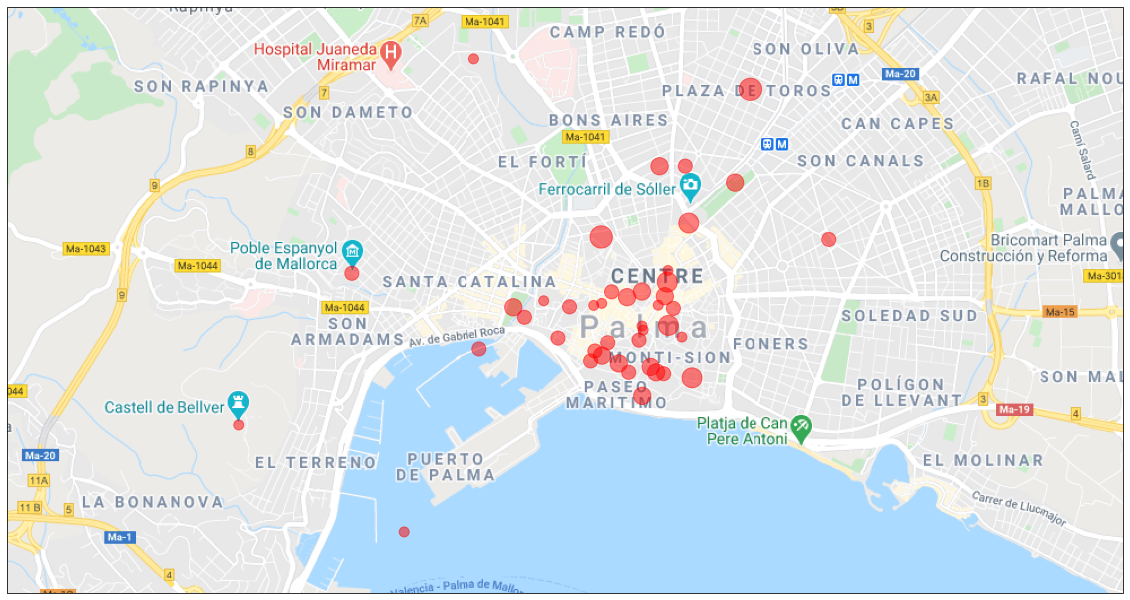

In [77]:
# values
latitude = tasks.latitude
longitude = tasks.longitude
sites = tasks.place
n_tourists = summary_df.iloc[15]*100

# Map background
ffig = plt.figure(figsize=(20,25))

tiler = cimgt.GoogleTiles()
mercator = tiler.crs
ax = plt.axes(projection=mercator)

llcrnrlat=39.553956  # The lower left corner geographical latitude
llcrnrlon=2.601714   # The lower left corner geographical longitude
urcrnrlat=39.588358  # The upper right corner geographical latitude
urcrnrlon=2.686728   # The upper left corner geographical latitude

ax.set_extent([llcrnrlon,urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())

zoom = 14
ax.add_image(tiler, zoom )

ax.scatter(longitude,latitude, s=n_tourists, 
           color='red', alpha=0.5,
           transform=ccrs.PlateCarree())


plt.show()